# COMPAS Cosmic Integration Tutorial

In this jupyter notebook we will run the COMPAS Cosmic Integration post-processing scripts using different SFRD prescriptions available in the default COMPAS. The data used for this tutorial is the COMPAS_Output.h5 from the Zenodo https://zenodo.org/record/5595426 from the paper https://arxiv.org/pdf/2010.00002.pdf by Jeff Riley. Note that this data is run with a **slightly older version of COMPAS**. This requires the use of an older version of ClassCOMPAS.py, or you'll get some issues with the naming conventions within the COMPAS data file.<br>

Notebook by Sasha Levina, based off of a part of the Chemically Homogeneous Evolution Tutorial by Floor Broekgaarden, Jeff Riley, and Ilya Mandel, originally created for the Saas Fee PhD School. <br>





Throughout this notebook and in class we will use several acronyms and definitions listed below    
    
    
    
### Definitions: 
    
 - CHE: Chemically Homogeneous Evolution
 - GW: Gravitational Waves 
 - DCO: Double Compact Object 
 - BH: Black Hole
 - NS: Neutron Star
 - Primary: in this notebook always refers to the star that was most massive at the zero age main sequence (ZAMS)
 - Secondary: in this notebook always refers to the star that was least massive at the zero age main sequence (ZAMS)
 - ZAMS: Zero Age Main Sequence: this is in COMPAS where stars start their lives. 
    

In [118]:
# First we will import some of the packages that we will use 

import h5py as h5
from IPython.display import Image # to open images in Ipython 

In [ ]:
# Add path to where the COMPAS_Output.h5 file is stored

COMPASpath = '/Users/sashalvna/Research/Cosmic_integration_tutorial/COMPAS_Output.h5' # change this line! 

# The following line reads in the data 
COMPASdata = h5.File(COMPASpath, 'r')
list(COMPASdata.keys()) #check the keys!! If you're using a more recent COMPAS version you might get some issues from the naming here

# Can check these as well if it's not finding the right variable names (uncomment to run)
#list(COMPASdata['DoubleCompactObjects'].keys()) 
#list(COMPASdata['SystemParameters'].keys())

# to close the file you will have to use fdata.close()

['CommonEnvelopes', 'DoubleCompactObjects', 'Supernovae', 'SystemParameters']

## Running Cosmic Integration

We will now calculate the merger rate for BBHs using the script FastCosmicIntegration, and plot it as a function of redshift. 
Running this code will create a plot with four panels that show the properties of the BBHs.


In [ ]:
# Run FastCosmicIntegration
# Change the path!! Note that this is the path without the filename
!python FastCosmicIntegration_tutorial.py \
--dco_type 'BBH' \
--path '/Users/sashalvna/Research/Cosmic_integration_tutorial/' \
--filename 'COMPAS_Output.h5' \
--maxz 14 \
--dontAppend

USING PLANCK18 AS COSMOLOGY! if working with Illustris TNG data please use Planck15 instead
Calculate detection rates
Running find_detection_rate with the following parameters: path /Users/sashalvna/Research/SFRD_merger_rate_tutorials/, filename COMPAS_Output.h5, dco_typeBBH, weight_column None
merges_hubble_time True, pessimistic_CEE True, no_RLOF_after_CE True,
max_redshift 14.0, max_redshift_detection 1, redshift_step 0.001, z_first_SF 10,
m1_min 5.0 solMass, m1_max 150.0 solMass, m2_min 0.1 solMass, fbin 0.7,
aSF 0.01, bSF 2.77, cSF 2.9, dSF 4.7, mu0 0.035, muz -0.23, sigma0 0.39, sigmaz 0.0, alpha 0.0, min_logZ -12.0, max_logZ 0.0, step_logZ 0.01
sensitivity O3, snr_threshold 8, Mc_max 300.0, Mc_step 0.1, eta_max 0.25, eta_step 0.01, snr_max 1000.0, snr_step 0.1
noRLOFafterCEE, pessimistic: True True
using system params
sum(type_masks[BBH]) 260622, sum(hubble_mask) 78361, sum(rlof_mask) 281902, sum(pessimistic_mask) 262175
/Users/sashalvna/Research/SFRD_merger_rate_tutorials/FastC

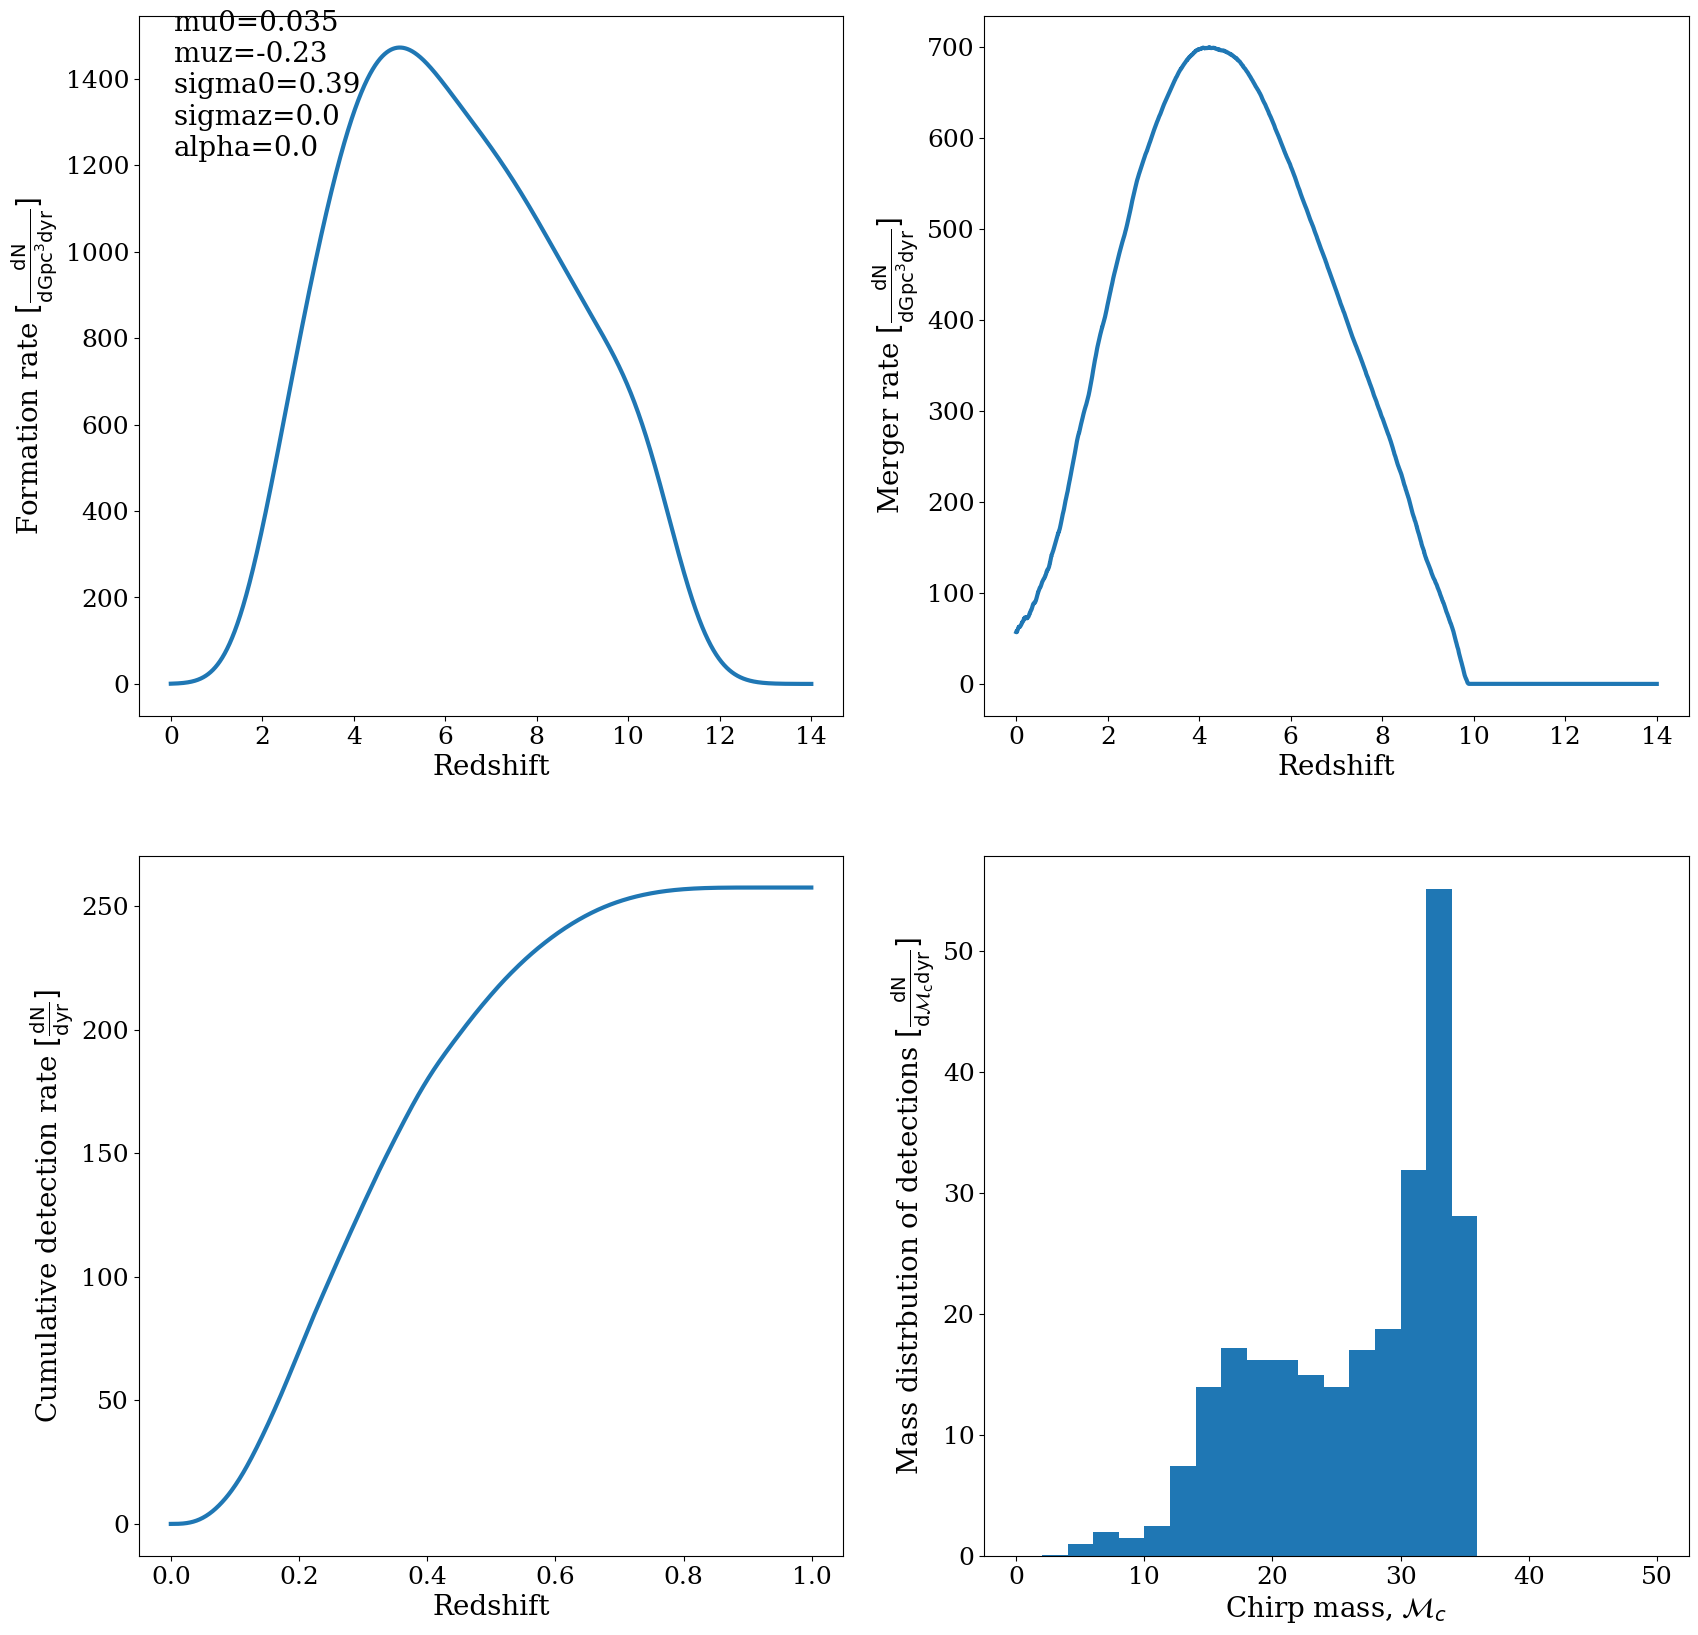

In [130]:
# Show the image in the notebook
# If you change the parameters, change the name of the file here (name contains the SFRD parameter values)
Image(filename='Rate_Infomu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_a0.01_b2.77_c2.9_d4.7.png', width=700)  

Let's go through each plot:

- Top left plot shows the formation rate. This is rate at which the BBHs form, measured when the 2nd BH forms.

- Top right plot shows the merger rate. This is the rate at which the BBHs actually merge (accounting for the delay time!)

- Bottom left plot shows the detection rate. This is the rate at which the BBH mergers are detected, which depends on current detector capability. You can select the detector using the "sensitivity" argument when running FastCosmicIntegration

- Bottom right plot shows the chirp mass distribution for the BBH mergers. This is a combination of the two black hole masses.

## Varying the SFRD(Z, z)

### SFRD(z) parameters; the defaults are from Neijssel et al 2019
- $a$ = normalization of the SFRD(z), default=0.01 (aSF)
- $b$ = low-redshift slope of the SFRD(z), default=2.77 (bSF)
- $c$ = location of the peak of the SFRD(z), default=2.90 (cSF)
- $d$ = high-redshift slope of the SFRD(z), default=4.70 (dSF)

### Metallicity distribution (dP/dlogZ) parameters
- $\mu_0$ = mean metallicity at z=0, default=0.035 (mu0)
- $\mu_z$ = redshift evolution of mean metallicity, default=-0.23 (muz)
- $\sigma_0$ = variance/width of metallicity density distribution at z=0, default=0.39 (sigma0)
- $\sigma_z$ = redshift evolution of variance, default=0.0 (sigmaz)
- $\alpha$ = skewness of metallicity density distribution (negative value = low-metallicity tail), default=0.0  (alpha)

In [ ]:
# Let's try changing one of the SFRD(z) parameters, adding some skewness to the metallicity distribution

!python FastCosmicIntegration_tutorial.py \
--dco_type 'BBH' \
--path '/Users/sashalvna/Research/Cosmic_integration_tutorial/' \
--filename 'COMPAS_Output.h5' \
--maxz 15 \
--mu0 0.1 \
--dontAppend

USING PLANCK18 AS COSMOLOGY! if working with Illustris TNG data please use Planck15 instead
Calculate detection rates
Running find_detection_rate with the following parameters: path /Users/sashalvna/Research/SFRD_merger_rate_tutorials/, filename COMPAS_Output.h5, dco_typeBBH, weight_column None
merges_hubble_time True, pessimistic_CEE True, no_RLOF_after_CE True,
max_redshift 15.0, max_redshift_detection 1, redshift_step 0.001, z_first_SF 10,
m1_min 5.0 solMass, m1_max 150.0 solMass, m2_min 0.1 solMass, fbin 0.7,
aSF 0.01, bSF 2.77, cSF 2.9, dSF 4.7, mu0 0.1, muz -0.23, sigma0 0.39, sigmaz 0.0, alpha 0.0, min_logZ -12.0, max_logZ 0.0, step_logZ 0.01
sensitivity O3, snr_threshold 8, Mc_max 300.0, Mc_step 0.1, eta_max 0.25, eta_step 0.01, snr_max 1000.0, snr_step 0.1
noRLOFafterCEE, pessimistic: True True
using system params
sum(type_masks[BBH]) 260622, sum(hubble_mask) 78361, sum(rlof_mask) 281902, sum(pessimistic_mask) 262175
/Users/sashalvna/Research/SFRD_merger_rate_tutorials/FastCos

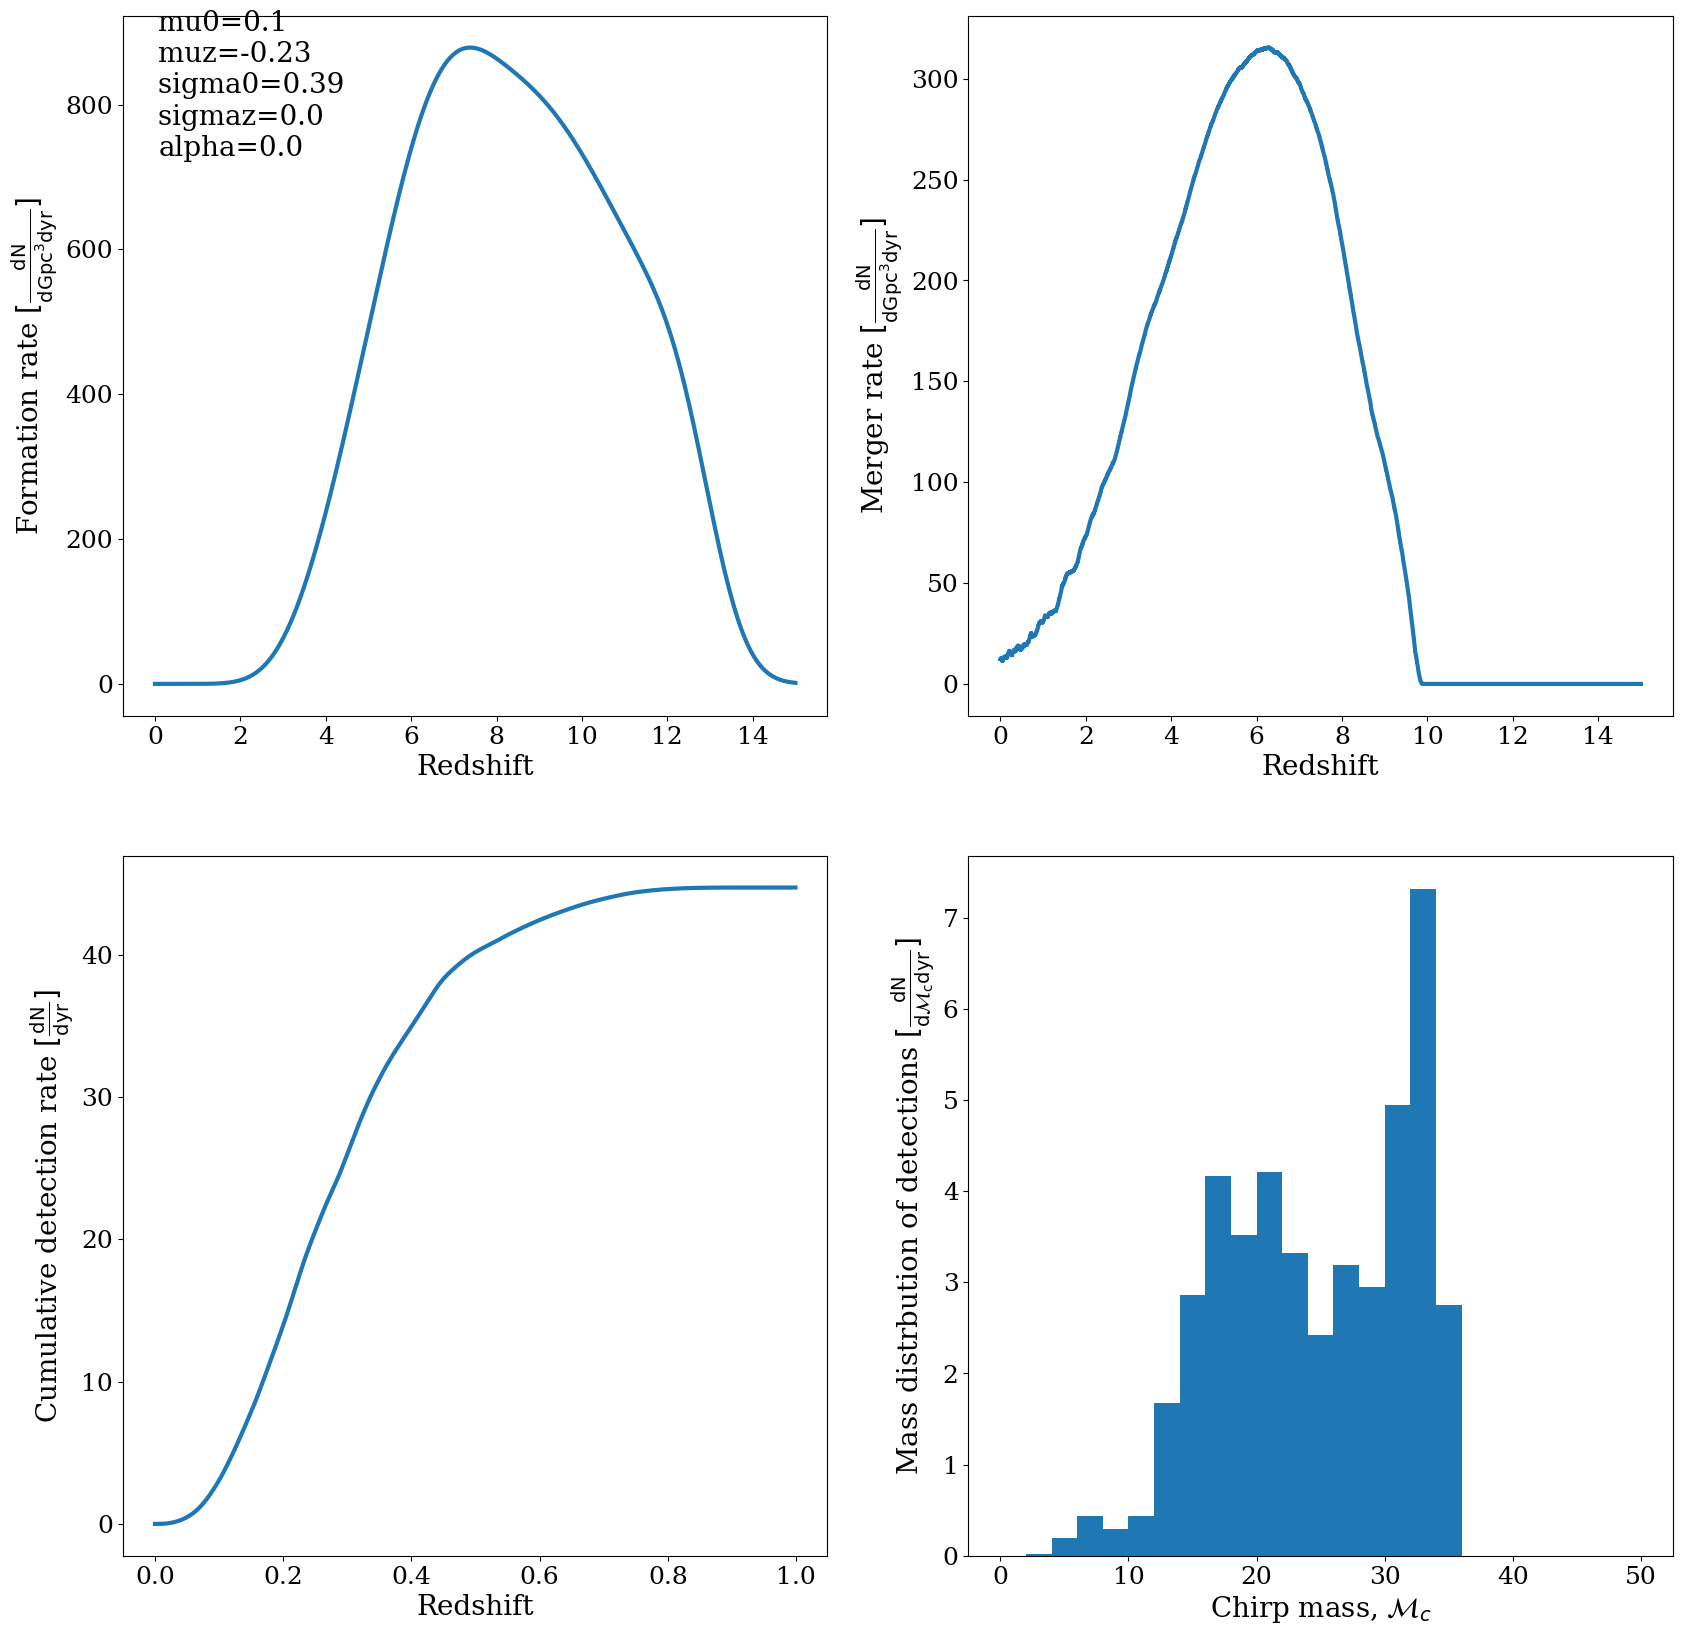

In [138]:
# Show the image in the notebook
# Notice that we needed to change the name of the file to match!
Image(filename='Rate_Infomu00.1_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0_a0.01_b2.77_c2.9_d4.7.png', width=700)  

## Exercise 1:

Run FastCosmicIntegration, varying one SFRD parameter at a time. What effect does each parameter have on the merger rate? The other plots?
(Hint: the names of the arguments are listed in parentheses in the list of parameters above)

## Exercise 2:

Run FastCosmicIntegration, varying the parameters according to the fiducial/min/max values in van Son et al 2023 (Table 2 of https://arxiv.org/pdf/2209.03385). What is the miminum and maximum local (z=0) merger rate that you can get? 

## Other FastCosmicIntegration options

We have so far only varied the SFRD(Z, z) parameters when running FastCosmicIntegration. 
If you open FastCosmicIntegration.py and go to the bottom of the file, you will see a list of arguments. These are the options you can use when running FastCosmicIntegration. Try changing some arguments we haven't used yet from their defaults:

1. Change the maximum redshift of detection. How does this affect the cumulative detection rate plot?
2. Change the detector sensitivity. How does this affect the cumulative detection rate plot?
3. Change the redshift of first star formation to a lower redshift. How does this affect the rates?
4. Now change any arguments you'd like! What do you expect to see? What do you see?

# Extra material:

[//]: ## (grip -b README.md)



## Compact Object Mergers: Population Astrophysics & Statistics

[![Documentation](https://img.shields.io/badge/Documentation-latest-orange.svg?style=flat)](https://github.com/TeamCOMPAS/COMPAS/blob/Documentation/COMPAS_Documentation.pdf)

[//]: ## (Outline features)
COMPAS is a publicly available rapid binary population synthesis code (https://compas.science/) that is designed so that evolution prescriptions and model parameters are easily 
adjustable.  COMPAS draws properties for a binary star system from a set of initial distributions, and evolves it from zero-age main sequence to the end of its life as two compact 
remnants.  It has been used for inference from observations of gravitational-wave mergers, Galactic neutron stars, X-ray binaries, and luminous red novae.

### Documentation
https://compas.science/docs